 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
#importing the pandas package is used for data modelling, analysis and data manipulation.
import pandas as pd

In [2]:
#This code allows us to import the excel file which will then be able to extract data from it.
removing = pd.read_csv('TheE-commerceDataset.csv')
removing.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [3]:
#using the sum function to count the total null values for each column
removing.isnull().sum()
#in this case there are 17 null values for rating, 22 null values for helpfulness and 27 null values for gender.



userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [4]:
#using the len function to see the length of the data before cleansing it which is 20000
print(len(removing))

20000


In [5]:
#This code allows us to drop any null values from a  row that are in a column of either rating, helpfulness or gender.
see = removing.dropna(subset = ['rating', 'helpfulness', 'gender'])

In [6]:
#the following function will define the index to drop all values of 'none' in a column called 'review'
cleaning = see[see['review'] == 'none'].index

In [7]:
""" Using pandas dataframe drop function will drop the rows from the cleaning variable and is now being store in a
new variable called 'cleaning2'. """
cleaning2 = see.drop(cleaning)

In [9]:
#the length function is used to check the length of the data after it was cleansed
len(cleaning2)

19916

In [10]:
#using isnull and sum function to get the sum of null values from each column after data was cleansed
cleaning2.isnull().sum() #No null value comes up which indicates the code was successful 

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

### Comment

Cleaning data is essential to remove any information that do not make sense or practically have no sort of value. In this case, gender, rating and helpfulness had null values and reviews having a value of 'none' and this lead to cleansing the data by removing the rows and proceeding to check the length of the data to see if that was cleaned.

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [12]:
#the following codes allow us to get the unique and total number of users, reviews, items and categories.
u_id = len(cleaning2.userId.unique()) #gets the unique values of users
u_reviews = len(cleaning2.review.unique()) #unique values of reviews
u_items = len(cleaning2.item.unique()) #unique values for items
u_categories = len(cleaning2.category.unique()) # unique values of categories
print("There are " + str(u_id) + " ids, " + str(u_reviews) + " unique reviews " + str(u_items) + " unique items " + "and "
      + str(u_categories) + " unique categories") #printing the unique values out with clear indications of the column values

There are 8562 ids, 19459 unique reviews 89 unique items and 9 unique categories


In [13]:
#using the function such as .sum(), .mean() etc gives out the descriptive stat values from the rating records
print("Total number:", cleaning2.rating.sum(), " Mean:",  cleaning2.rating.mean(), " Standard deviation:" ,
      cleaning2.rating.std(), " The max value:",  cleaning2.rating.max(), " The min value:",  cleaning2.rating.min())

Total number: 73725.0  Mean: 3.7017975497087767  Standard deviation: 1.4044507218710944  The max value: 5.0  The min value: 1.0


In [14]:
"""using the groupby function to seperate and are used for data aggregation to retrieve descriptive stats for items being
rated by different genders."""
grouping =cleaning2.groupby(['gender'])['item'].count()
print(grouping)

gender
F     9793
M    10123
Name: item, dtype: int64


In [15]:
#using the describe function to get the descriptive stat records of items being rated by different genders
grouping.describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

In [16]:
#similar to 2.3, in this case its using the groupby function for rating recieved in each items.
cleaning2.groupby(['item'])['rating'].agg(['mean', 'std', 'max', 'min', 'count'])

,mean,std,max,min,count
item,,,,,
AOL (America Online),2.500532,1.368528,5.0,1.0,939
All Advantage,3.412481,1.541706,5.0,1.0,657
Alta Vista (by 1stUp),3.541401,1.263341,5.0,1.0,157
Amazon.com,3.683333,1.571095,5.0,1.0,240
American Airlines,3.054054,1.417015,5.0,1.0,185
...,...,...,...,...,...
Wendy's,3.971429,1.093322,5.0,1.0,210
What Lies Beneath,3.450000,1.201676,5.0,1.0,160
X-Men,4.118367,0.853074,5.0,1.0,245


### Comment

The following answers provided the number of unique values of users, reviews, items and categories from the entire table and established an understanding of basic descriptive values about the variables in this dataset which included knowing the mean, std, min, max and total number from different column values such as gender, item and rating.
The descriptive stat helped summariase the data which helped measure tendency and varability.


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='gender', ylabel='rating'>

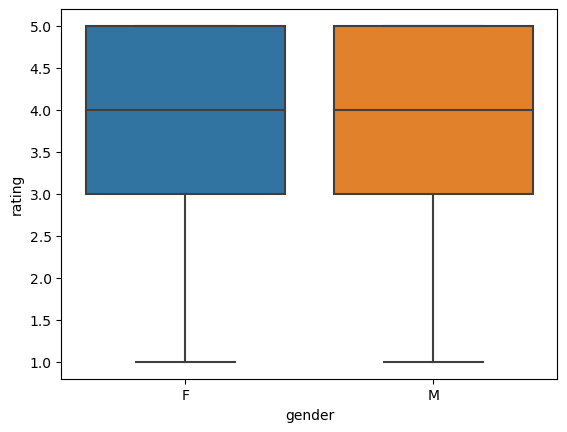

In [18]:
"""using a boxplot to make comparison and using the seaborn package for a more clearer and colourful boxplot.
The relation between the gender of males and females and rating are no different from each other"""
sns.boxplot(x = 'gender', y = 'rating', data = cleaning2) 

<Axes: xlabel='helpfulness', ylabel='rating'>

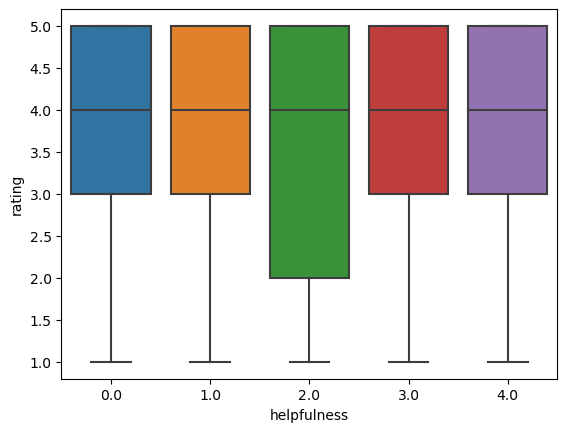

In [19]:
"""the relation between helpfulness values and rating shows almost no difference besides the helpfuness with the value 2
tends to have a smaller lower quartile"""
sns.boxplot(x = 'helpfulness', y = 'rating', data = cleaning2)

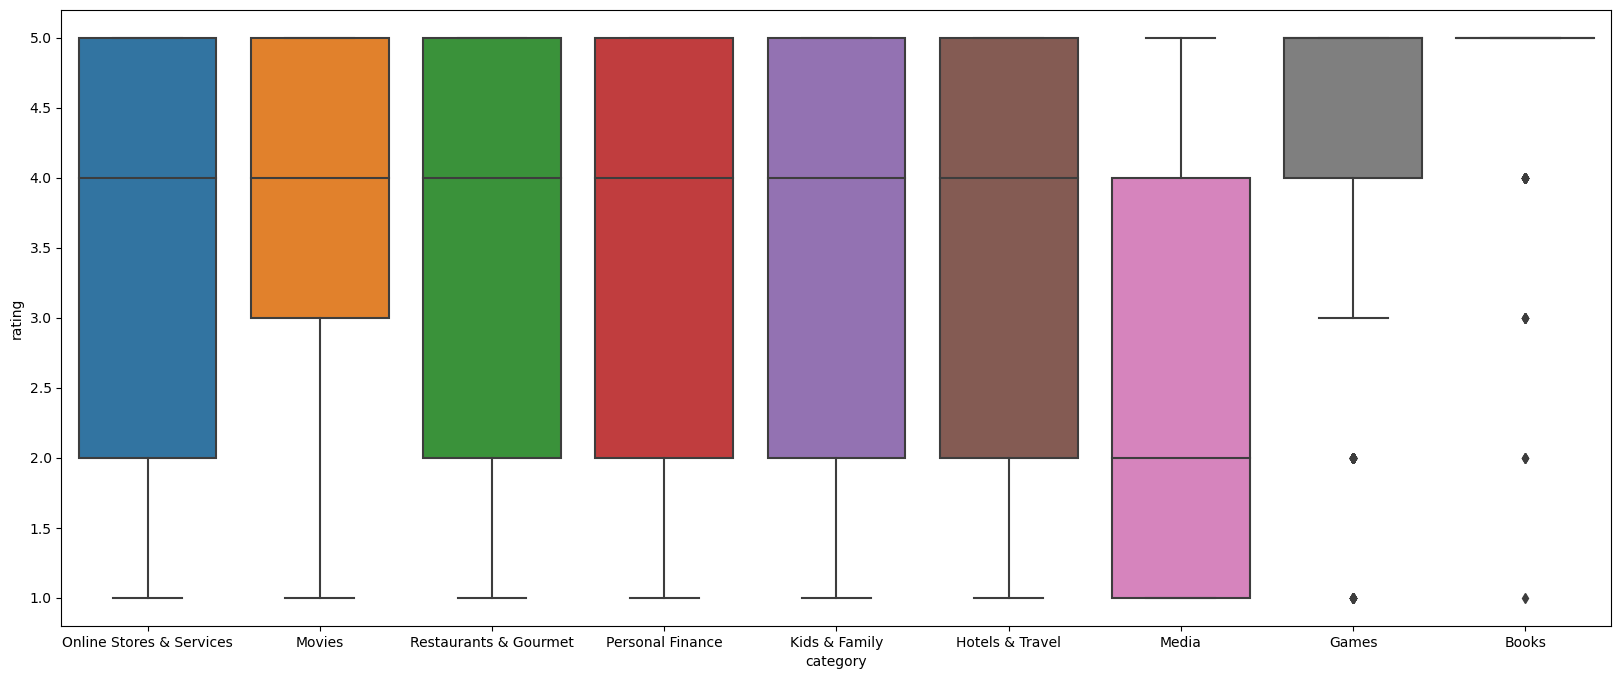

In [20]:
"""This boxplot shows a relation between categories and rating. Media tends to have a lower rating comparing to the 
other categories while other values not including games and books tend to have the same mean. Games and books are the only
values that contains outliers. Games tend to be an anomoly as it's lower quartile is marked as the highest among all other
values."""
plt.figure(figsize = (20,8))
plot = sns.boxplot(x = 'category', y = 'rating', data = cleaning2)

plt.show()

### Comment
There is no correlation between Females and males with rating as neither of the genders show any different ratings
The second boxplot values of helpfulness does not show a higher rating among each other as they all have the same median which is the rating of 4, the upper quartile are all the same, they all have a minimum value of 1 and only difference is the helpfulness value of 2 which has a lower quartile rating value of 2.
The third boxplot seems that the different categories tend to provide different ratings from each other. Example of this is that media has a lower mean rating value of 2 while most of the other categories have a rating value of 4. There is a few outliers in the categories of games which are in rating of 1 and 2 which can be excluded and also for books which is a rating of 1 2 3 4.
The boxplots with the use of the seaborn package helps distinguish between values and ratings in a clear matter.


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [22]:
len(cleaning2) #using the length function before the removal of the outliers to see the row values.

19916

In [23]:
cleaning2.drop(index = cleaning2.index[cleaning2.helpfulness > 2], inplace = True)
cleaning2.head() #this function allows to remove any outliers that have a helpfulness rating greater than two.

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
5,33,30100,What is the &quot;Matrix&quot; Great Movie,Matrix,4.0,0.0,F,Movies,40,24.51,31
7,33,52800,E-commerce..what do I do???,PayPal,4.0,0.0,F,Personal Finance,52,38.00,31
8,33,52800,A man who remade himself..,Wendy's,5.0,0.0,F,Restaurants & Gourmet,84,69.00,31


In [24]:
len(cleaning2) #this checks the length of the table after the first outliers are remvoed.

6273

In [43]:
#groups the values and detects if there are any outliers that have users rating less than 7
group = cleaning2.groupby(['userId'])['rating'].count() 
Detecting = group[group >= 7].index
cleaning2 = cleaning2[cleaning2['userId'].isin(Detecting)]
cleaning2.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
1284,4479,12600,Wonderful service,Alta Vista (by 1stUp),3.0,0.0,M,Online Stores & Services,2,46.63,13
1286,4479,20800,Always fun to have a FREERIDE in life,FreeRide.com,5.0,0.0,M,Online Stores & Services,28,147.00,13
1287,4479,30200,Mypoints is cool,MyPoints.com,5.0,0.0,M,Online Stores & Services,43,72.00,13
1288,4479,31300,StartSampling Stop Sampling,StartSampling.Com,3.0,0.0,M,Online Stores & Services,72,49.00,13
1289,4479,41000,I have mixed feelings....,FOX,3.0,0.0,M,Media,25,80.00,13


In [44]:
len(cleaning2)

119

In [47]:
"""similar to the code before but instead it groups the item with rating and to remove outliers which recieves less than 11 
rating"""

item_rating = cleaning2.groupby(['item'])['rating'].count()
outlier = cleaning2[cleaning2['rating'] < 11].index
cleaning2 = cleaning2[cleaning2['rating'].isin(outlier) == False]
cleaning2.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
1284,4479,12600,Wonderful service,Alta Vista (by 1stUp),3.0,0.0,M,Online Stores & Services,2,46.63,13
1286,4479,20800,Always fun to have a FREERIDE in life,FreeRide.com,5.0,0.0,M,Online Stores & Services,28,147.00,13
1287,4479,30200,Mypoints is cool,MyPoints.com,5.0,0.0,M,Online Stores & Services,43,72.00,13
1288,4479,31300,StartSampling Stop Sampling,StartSampling.Com,3.0,0.0,M,Online Stores & Services,72,49.00,13
1289,4479,41000,I have mixed feelings....,FOX,3.0,0.0,M,Media,25,80.00,13


In [39]:
len(cleaning2)#printing the length of the final cleaned data

119

### Comment
removing outliers is important especially with this dataset as it can affect the statistical analysis and greatly skew the results. The first step was to remove outliers that have a helpfulness rating greater than 2 which greatly decreased the length of the data to 6273. The next two step was using the groupby function to group two different values in order to remove the outliers such as users rating less than 7 items and items recieved less than 11 ratings. Overall the removal of outliers helped increase the accuracy of the dataset.